: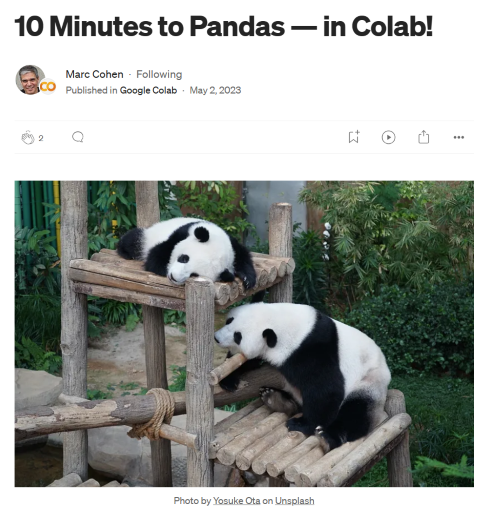

[Quelle](https://medium.com/google-colab/10-minutes-to-pandas-now-in-colab-a7a629a630dc)

###Introduction


This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the <a href="https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook" target="_blank">Cookbook<a/>.

Customarily, we import as follows:

In [ ]:
import numpy as np
import pandas as pd

## Object Creation


See the <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro">Intro to data structures section</a>.

Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a> by passing a list of values, letting pandas create a default integer index:

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing a NumPy array, with a datetime index using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.date_range.html#pandas.date_range">`date_range()`</a> and labeled columns:

In [ ]:
dates = pd.date_range("20130101", periods=6)
dates

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing a dictionary of objects that can be converted into a series-like structure:

In [ ]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

The columns of the resulting <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> have different <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes">`dtypes`</a>:

In [ ]:
df2.dtypes

If you’re using an interactive tool with automatic completion for column names, here’s a subset of the attributes that will be completed:
```
df2.<TAB>
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.columns
df2.align              df2.copy
df2.all                df2.count
df2.any                df2.combine
df2.append             df2.D
df2.apply              df2.describe
df2.applymap           df2.diff
df2.B                  df2.duplicated
```
As you can see, the columns `A`, `B`, `C`, and `D` are automatically tab completed. `E` and `F` are there as well; the rest of the attributes have been truncated for brevity.



## Viewing data

See the <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/basics.html#basics">Basics section</a>.

Use <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head">`DataFrame.head()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail">`DataFrame.tail()`</a> to view the top and bottom rows of the frame respectively:

In [ ]:
df.head()

In [ ]:
df.tail(3)

Display the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html#pandas.DataFrame.index">`DataFrame.index`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html#pandas.DataFrame.columns">`DataFrame.columns`</a>:

In [ ]:
df.index

In [ ]:
df.columns

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: **NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column**. When you call <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a>, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being `object`, which requires casting every value to a Python object.

For `df`, our <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> of all floating-point values, and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> is fast and doesn’t require copying data:

In [ ]:
df.to_numpy()

For `df2`, the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> with multiple dtypes, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> is relatively expensive:



In [ ]:
df2.to_numpy()

NOTE: <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> does not include the index or column labels in the output.

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe">`describe()`</a> shows a quick statistic summary of your data:

In [ ]:
df.describe()

Transposing your data:

In [ ]:
df.T

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html#pandas.DataFrame.sort_index">`DataFrame.sort_index()`</a> sorts by an axis:

In [ ]:
df.sort_index(axis=1, ascending=False)

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values">`DataFrame.sort_values()`</a> sorts by values:

In [ ]:
df.sort_values(by='B')

## Selection

NOTE: While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat">`DataFrame.iat()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a>.

See the indexing documentation <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing">Indexing and Selecting Data</a> and <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/advanced.html#advanced">MultiIndex / Advanced Indexing</a>.



### Getting

Selecting a single column, which yields a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a>, equivalent to `df.A`:

In [ ]:
df["A"]

Selecting via `[]` (`__getitem__`), which slices the rows:

In [ ]:
df[0:3]

In [ ]:
df["20130102":"20130104"]

### Selection by label

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label">Selection by Label</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

For getting a cross section using a label:

In [ ]:
df.loc[dates[0]]

Selecting on a multi-axis by label:

In [ ]:
df.loc[:, ["A", "B"]]

Showing label slicing, both endpoints are included:

In [ ]:
df.loc["20130102":"20130104", ["A", "B"]]

Reduction in the dimensions of the returned object:

In [ ]:
df.loc["20130102", ["A", "B"]]

For getting a scalar value:

In [ ]:
df.loc[dates[0], "A"]

For getting fast access to a scalar (equivalent to the prior method):

In [ ]:
df.at[dates[0], "A"]

### Selection by position

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer">Selection by Position</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

Select via the position of the passed integers:

In [ ]:
df.iloc[3]

By integer slices, acting similar to NumPy/Python:

In [ ]:
df.iloc[3:5, 0:2]

By lists of integer position locations, similar to the NumPy/Python style:

In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

For slicing rows explicitly:

In [ ]:
df.iloc[1:3, :]

For slicing columns explicitly:

In [ ]:
df.iloc[:, 1:3]

For getting a value explicitly:

In [ ]:
df.iloc[1, 1]

For getting fast access to a scalar (equivalent to the prior method):

In [ ]:
df.iat[1, 1]

### Boolean indexing

Using a single column’s values to select data:

In [ ]:
df[df["A"] > 0]

Selecting values from a DataFrame where a boolean condition is met:

In [ ]:
df[df > 0]

Using the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin">`isin()`</a> method for filtering:

In [ ]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

In [ ]:
df2[df2["E"].isin(["two", "four"])]

### Setting

Setting a new column automatically aligns the data by the indexes:

In [ ]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

In [ ]:
df["F"] = s1

Setting values by label:

In [ ]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [ ]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [ ]:
df.loc[:, "D"] = np.array([5] * len(df))

The result of the prior setting operations:

In [ ]:
df

A `where` operation with setting:

In [ ]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

## Missing data

pandas primarily uses the `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data) section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [ ]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

[`DataFrame.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) drops any rows that have missing data:



In [ ]:
df1.dropna(how='any')

[`DataFrame.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) fills missing data:

In [ ]:
df1.fillna(value=5)

[`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#pandas.isna) gets the boolean mask where values are `nan`:

In [ ]:
pd.isna(df)

## Operations

See the [Basic section on Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### Stats

Operations in general *exclude* missing data.

Performing a descriptive statistic:


In [ ]:
df.mean()

Same operation on the other axis:

In [ ]:
df.mean(1)

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically
broadcasts along the specified dimension

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)
s

In [ ]:
df.sub(s, axis='index')

### Apply

[`DataFrame.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply) applies a user defined function to the data:

In [ ]:
df.apply(np.cumsum)

In [ ]:
df.apply(lambda x: x.max() - x.min())

### Histogramming

See more at [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization).

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

In [ ]:
s.value_counts()

### String Methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods).

In [ ]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging).

Concatenating pandas objects together along an axis with [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat):

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))
df

In [ ]:
# break it onto pieces
pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

NOTE: Adding a column to a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) constructor instead of building a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) by iteratively appending records to it.

### Join

[`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge) enables SQL style join types along specific columns. See the [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join) section.

In [ ]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

Adding a column to a `DataFrame` is relatively fast. However adding a row requires a copy, and may be expensive. It is recorecommended passing a pre-build list of records to the `DataFrame` constructor instead of buildinga `DataFrame` by iteratively appending records to it.

Another example that can be given is:

In [ ]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

## Grouping

By 'group by' we are referring to a process invloving one or more of the following steps:


*   **Splitting** the data into group base on some criteria
*   **Applying** a function to each group independently

*   **Combining** the results into a data structure

See the [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby).


In [ ]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

Grouping and then applying the `sum()` funcion to the resulting group:

In [ ]:
df.groupby('A')[["C", "D"]].sum()

Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum()` function:

In [ ]:
df.groupby(["A", "B"]).sum()

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [ ]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns:



In [ ]:
stacked = df2.stack()
stacked

With a “stacked” DataFrame or Series (having a [MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex) as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [ ]:
stacked.unstack()

In [ ]:
stacked.unstack(1)

In [ ]:
stacked.unstack(0)

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [ ]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index`, and `columns`



In [ ]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries) section.

In [ ]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [ ]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts, "\n")
ts_utc = ts.tz_localize("UTC")
ts_utc

Converting between time span representations:

In [ ]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()
ps

In [ ]:
ps.to_timestamp()

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [ ]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [ ]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

Converting the raw grades to a categorical data type:

In [ ]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

Rename the categories to more meaningful names:

In [ ]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [ ]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

Sorting is per order in the categories, not lexical order:

In [ ]:
df.sort_values(by="grade")

Grouping by a categorical column also shows empty categories:

In [ ]:
df.groupby("grade").size()

## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

In [ ]:
import matplotlib.pyplot as plt
plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

In [ ]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [ ]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [ ]:
pd.read_csv("foo.csv")

### HDF5

Reading and writing to [HDFStores](https://pandas.pydata.org/docs/user_guide/io.html#io-hdf5).

Writing to a HDF5 Store using [`DataFrame.to_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html#pandas.DataFrame.to_hdf):

In [ ]:
df.to_hdf("foo.h5", "df")

Reading from a HDF5 Store using [`read_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html#pandas.read_hdf):

In [ ]:
pd.read_hdf("foo.h5", "df")

### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [ ]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [ ]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

## Gotchas

If you are attempting to perform a boolean operation on a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) or [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) you might see an exception like:

In [ ]:
if pd.Series([False, True, False]):
     print("I was true")

See [Comparisons](https://pandas.pydata.org/docs/user_guide/basics.html#basics-compare) and [Gotchas](https://pandas.pydata.org/docs/user_guide/gotchas.html#gotchas) for an explanation and what to do.